# Weed Detection in Soybean Crops

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import splitfolders
import pandas as pd

## Data Split

In [2]:
input_dir='E:\\DATA Science\\DEEP LEARNING\\CNN\\Weed Detection in Soybean Crops\\Dataset\\dataset'
output_dir='E:\\DATA Science\\DEEP LEARNING\\CNN\\Weed Detection in Soybean Crops\\Dataset\\Split_data'

In [4]:
#splitfolders.ratio(input=input_dir,output=output_dir, ratio=(0.8, 0.1, 0.1))

## Data Preparation

In [5]:
Datagen=ImageDataGenerator(rescale=1/255)

In [6]:
train_dir='E:\\DATA Science\\DEEP LEARNING\\CNN\\Weed Detection in Soybean Crops\\Dataset\\Split_data\\train'
test_dir='E:\\DATA Science\\DEEP LEARNING\\CNN\\Weed Detection in Soybean Crops\\Dataset\\Split_data\\test'
val_dir='E:\\DATA Science\\DEEP LEARNING\\CNN\\Weed Detection in Soybean Crops\\Dataset\\Split_data\\val'

In [7]:
train_itt=Datagen.flow_from_directory(train_dir,target_size=(256,256))
test_itt=Datagen.flow_from_directory(test_dir,target_size=(256,256))
val_itt=Datagen.flow_from_directory(val_dir,target_size=(256,256))

Found 12267 images belonging to 4 classes.
Found 1537 images belonging to 4 classes.
Found 1532 images belonging to 4 classes.


## Model

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [9]:
model=Sequential()

In [13]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
          
model.add(Flatten())
          
model.add(Dense(512,activation='relu'))
          
model.add(Dense(4,activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [15]:
model.fit(train_itt,validation_data=val_itt,epochs=8)

Epoch 1/8
384/384 [==============================] - 1323s 3s/step - loss: 0.5902 - accuracy: 0.8000 - val_loss: 0.2933 - val_accuracy: 0.8943
Epoch 2/8
384/384 [==============================] - 1275s 3s/step - loss: 0.2798 - accuracy: 0.8977 - val_loss: 0.2213 - val_accuracy: 0.9158
Epoch 3/8
384/384 [==============================] - 1272s 3s/step - loss: 0.2001 - accuracy: 0.9280 - val_loss: 0.2332 - val_accuracy: 0.9106
Epoch 4/8
384/384 [==============================] - 1268s 3s/step - loss: 0.1163 - accuracy: 0.9566 - val_loss: 0.2072 - val_accuracy: 0.9236
Epoch 5/8
384/384 [==============================] - 1271s 3s/step - loss: 0.0864 - accuracy: 0.9705 - val_loss: 0.2440 - val_accuracy: 0.9138
Epoch 6/8
384/384 [==============================] - 1271s 3s/step - loss: 0.0357 - accuracy: 0.9875 - val_loss: 0.2952 - val_accuracy: 0.9178
Epoch 7/8
384/384 [==============================] - 1271s 3s/step - loss: 0.0320 - accuracy: 0.9903 - val_loss: 0.3325 - val_accuracy: 0.8988

In [18]:
losses= pd.DataFrame(model.history.history)

<AxesSubplot:>

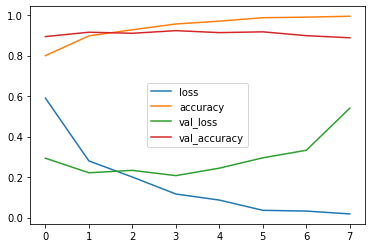

In [19]:
losses.plot()

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [21]:
prediction= model.evaluate(test_itt)

49/49 [==============================] - 53s 1s/step - loss: 0.6006 - accuracy: 0.8751


In [22]:
class_label=test_itt.class_indices
class_label

{'broadleaf': 0, 'grass': 1, 'soil': 2, 'soybean': 3}

In [23]:
model.save('weed_detection_modee.h5')